# Aqui iremos explorar os dados

In [58]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
url = "https://raw.githubusercontent.com/harshbg/Telecom-Churn-Data-Analysis/refs/heads/master/Telecom%20Churn.csv"
data = pd.read_csv(url)

In [45]:
data.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [35]:
data["international plan"] = data["international plan"].map({"yes": 1, "no": 0})
data["voice mail plan"] = data["voice mail plan"].map({"yes": 1, "no": 0})

In [42]:
data.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [37]:
data.drop(columns=["state","phone number"], inplace=True)

In [50]:
num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()

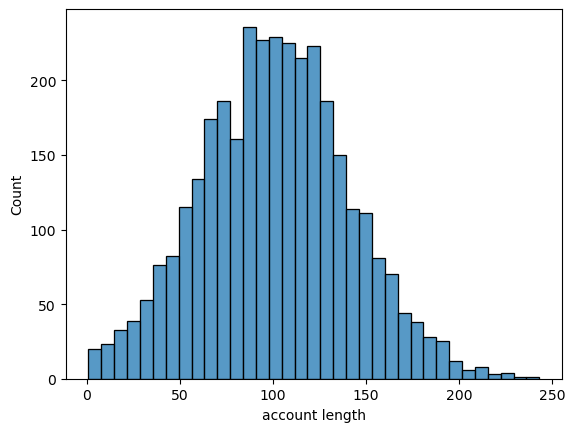

In [25]:
sns.histplot(data['account length'])
plt.show()

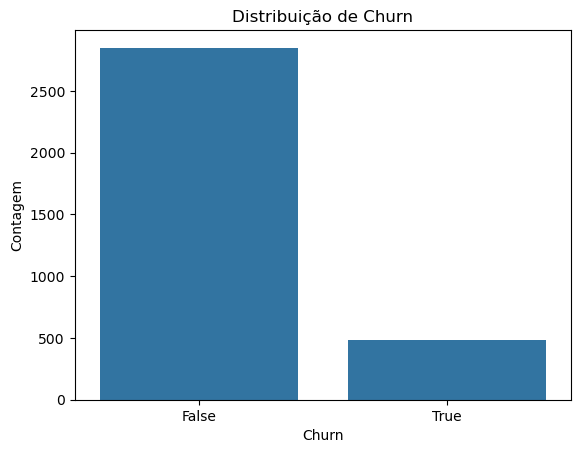

In [20]:
sns.countplot(x='churn', data=data)
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.show()

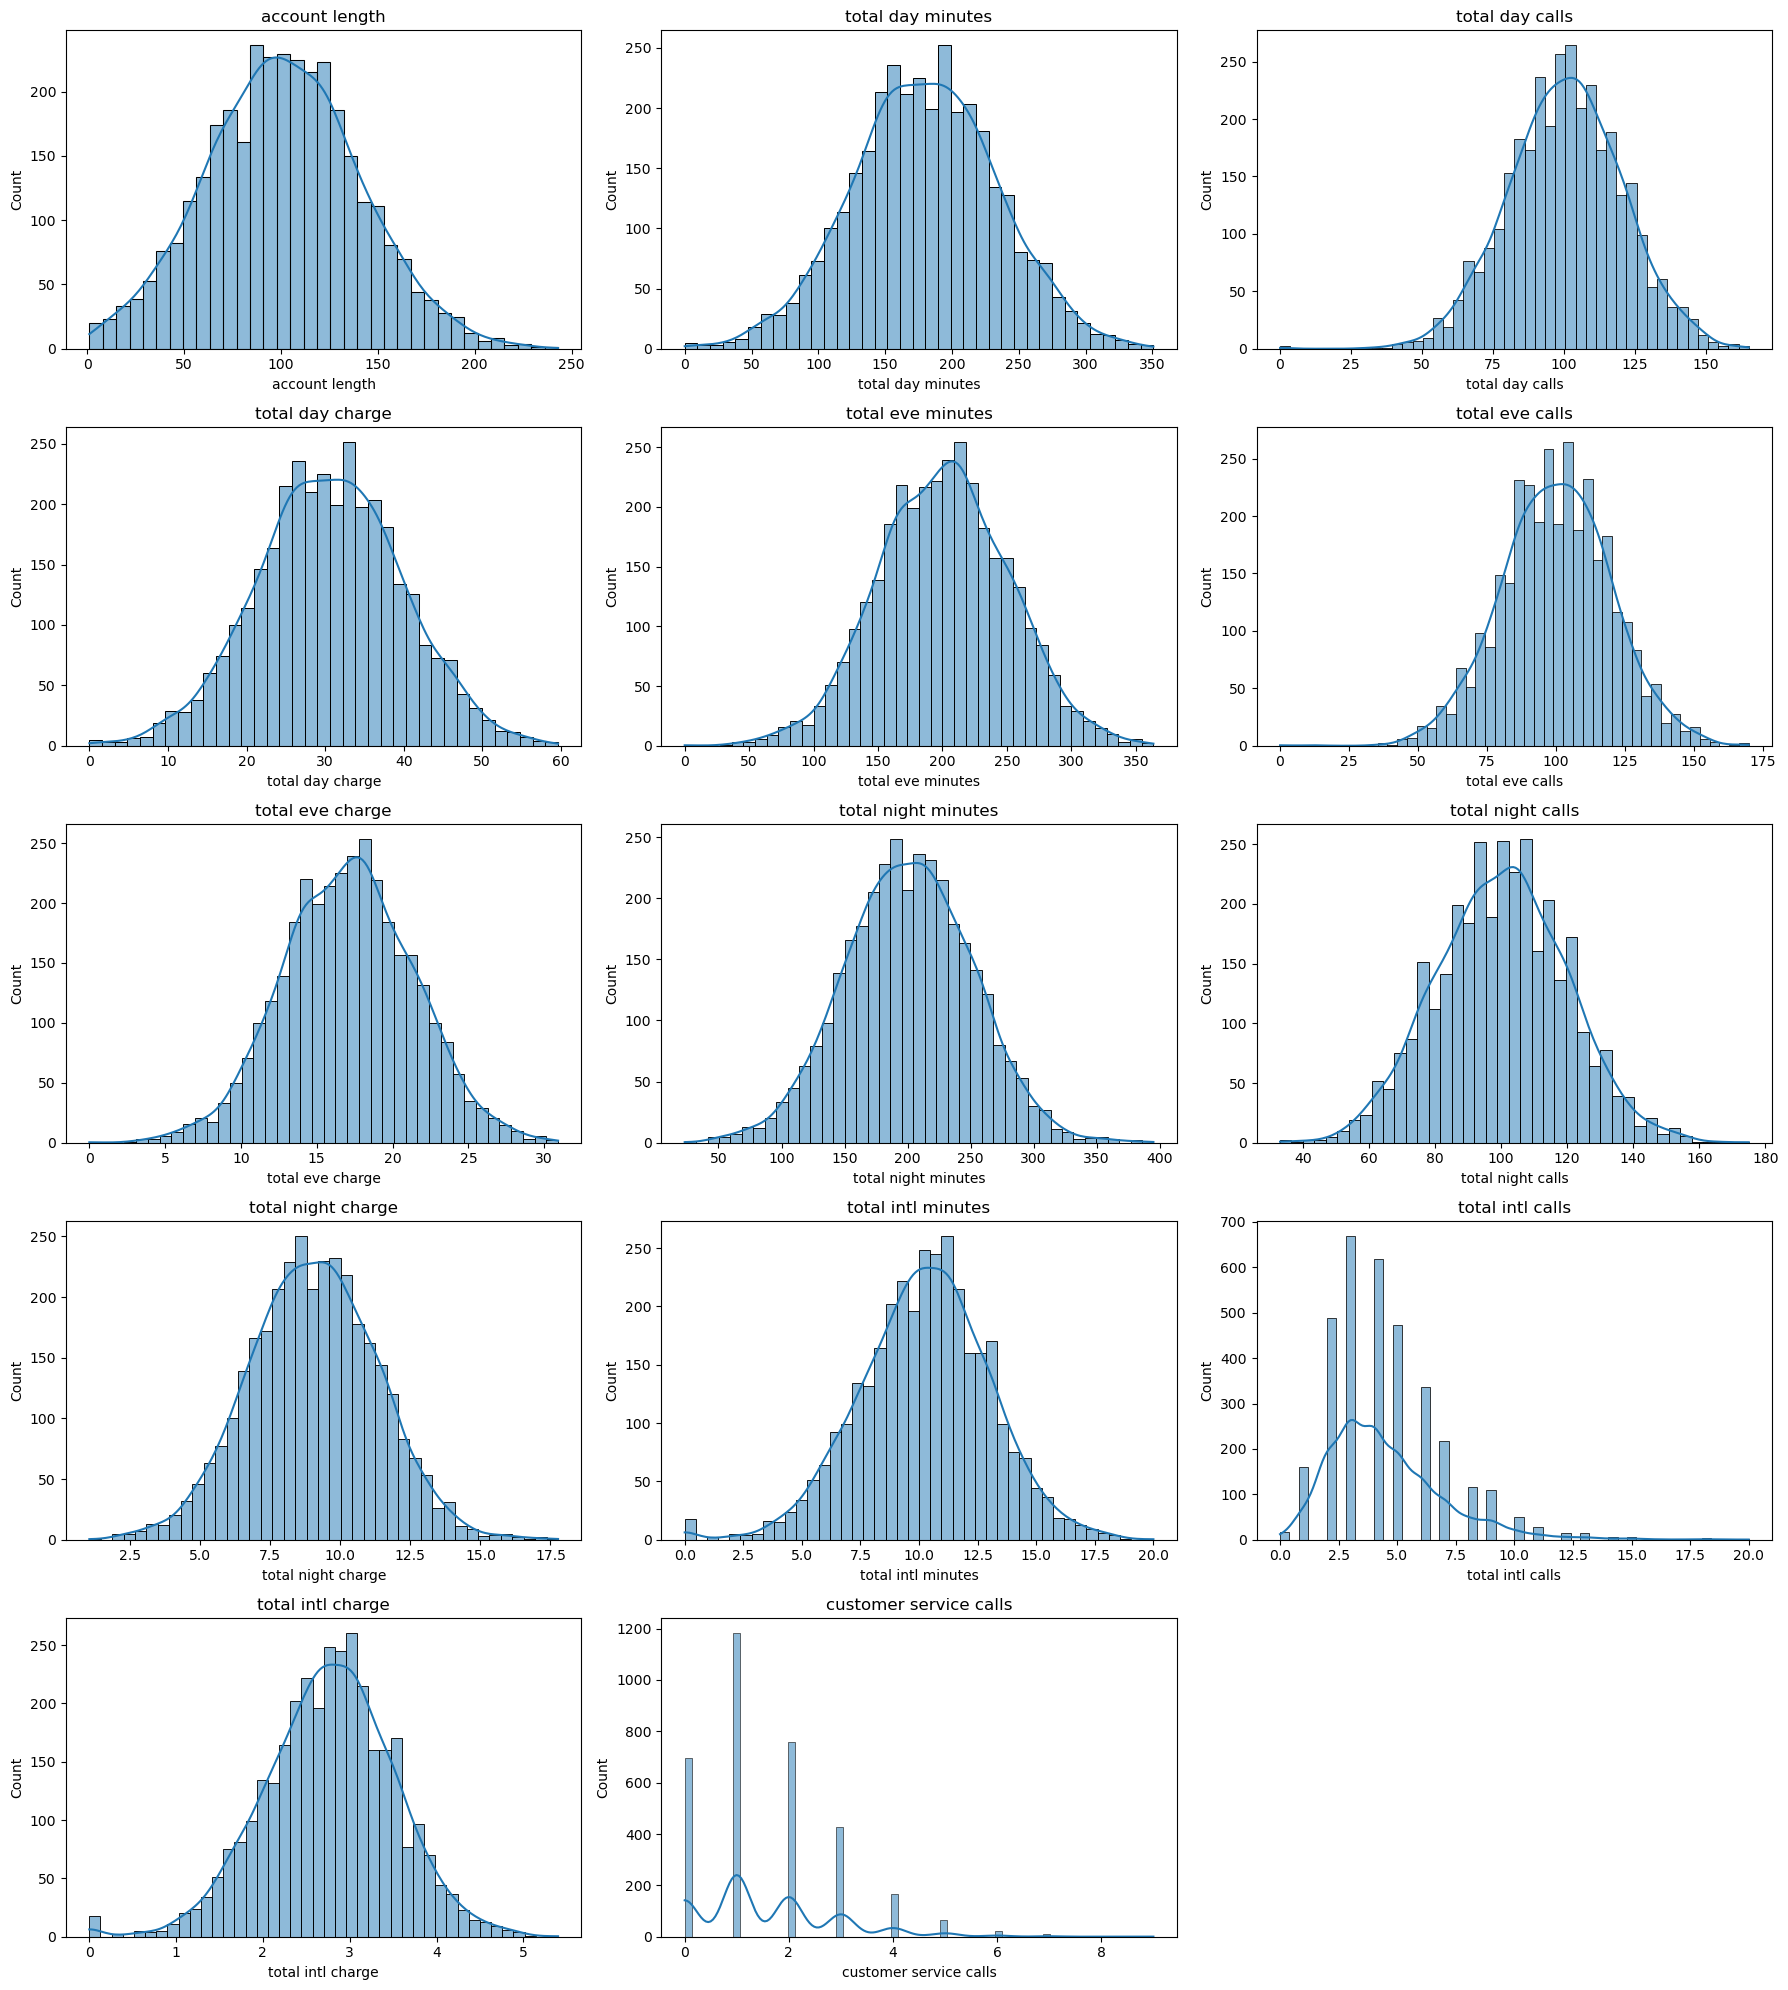

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 3
n_rows = (len(colunas_numericas) + n_cols - 1) // n_cols  

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))

for i, coluna in enumerate(colunas_numericas):
    row = i // n_cols
    col = i % n_cols
    
    sns.histplot(data[coluna], kde=True, ax=axs[row, col])
    axs[row, col].set_title(coluna)

for i in range(len(colunas_numericas), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axs[row, col].axis('off') 

plt.tight_layout()
plt.show()

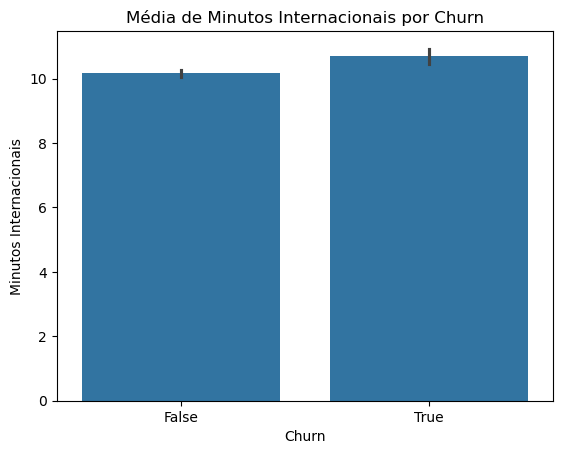

In [63]:
sns.barplot(x='churn', y='total intl minutes', data=data)
plt.title('Média de Minutos Internacionais por Churn')
plt.xlabel('Churn')
plt.ylabel('Minutos Internacionais')
plt.show()

In [32]:
colunas_numericas = [
    'account length', 'total day minutes', 'total day calls', 'total day charge',
    'total eve minutes', 'total eve calls', 'total eve charge',
    'total night minutes', 'total night calls', 'total night charge',
    'total intl minutes', 'total intl calls', 'total intl charge',
    'customer service calls'
]

df_numericas = data[colunas_numericas]

In [68]:
X = df_numericas
y = data['churn']

In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [72]:
X_res

,account length,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,265.100000,110,45.070000,197.400000,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1
1,107,161.600000,123,27.470000,195.500000,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1
2,137,243.400000,114,41.380000,121.200000,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0
3,84,299.400000,71,50.900000,61.900000,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2
4,75,166.700000,113,28.340000,148.300000,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,113,150.344821,117,25.556032,116.700152,89,9.923407,241.697085,76,10.878066,14.774290,3,3.990453,3
5696,54,283.012355,73,48.110875,223.638777,102,19.008716,197.118350,106,8.873180,11.241896,4,3.040312,1
5697,164,167.871574,122,28.535190,175.150712,103,14.887821,217.692177,65,9.794500,12.252397,3,3.310261,3
5698,92,144.035253,90,24.485911,176.385445,100,14.990299,225.134752,148,10.134316,16.386663,2,4.425069,2


In [73]:
y_res

0       False
1       False
2       False
3       False
4       False
        ...  
5695     True
5696     True
5697     True
5698     True
5699     True
Name: churn, Length: 5700, dtype: bool

# Treinando o modelo

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    stratify=y,
    random_state=42
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [92]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_res, y_train_res)  # Treine com dados balanceados
y_pred = modelo.predict(X_test)       # Teste com dados originais (não balanceados)

In [90]:
if 'churn' in X.columns:
    print("ERRO CRÍTICO: 'churn' está nas features!")
    X = X.drop('churn', axis=1)

In [93]:
print("\n👉 Distribuição REAL do teste (deve ter ~20% churn):")
print(y_test.value_counts(normalize=True))

print("\n👉 Relatório de Classificação:")
print(classification_report(y_test, y_pred))


👉 Distribuição REAL do teste (deve ter ~20% churn):
churn
False    0.855
True     0.145
Name: proportion, dtype: float64

👉 Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.94      0.92      0.93       855
        True       0.60      0.67      0.63       145

    accuracy                           0.89      1000
   macro avg       0.77      0.80      0.78      1000
weighted avg       0.89      0.89      0.89      1000



Testanto o modelo XGBOOST

In [97]:
import xgboost as xgb
from xgboost import XGBClassifier


modelo_xgb = XGBClassifier(
    scale_pos_weight=4,  
    eval_metric='logloss'
)
modelo_xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [100]:
y_pred_xgb = modelo_xgb.predict(X_test)

In [101]:
print("\n👉 Distribuição REAL do teste (deve ter ~20% churn):")
print(y_test.value_counts(normalize=True))

print("\n👉 Relatório de Classificação:")
print(classification_report(y_test, y_pred_xgb))


👉 Distribuição REAL do teste (deve ter ~20% churn):
churn
False    0.855
True     0.145
Name: proportion, dtype: float64

👉 Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.94      0.83      0.88       855
        True       0.40      0.68      0.51       145

    accuracy                           0.81      1000
   macro avg       0.67      0.75      0.69      1000
weighted avg       0.86      0.81      0.83      1000



Com esses dois resultados podemos notar que ao escolhermos todos os atributos numéricos do dataset, o modelo se comportou de forma bem aceitável para uma tarefa de classificação de cancelamento no mercado de telecomunicações, acredito que se eu conseguir explorar melhor as features posso alcançar resultados melhores nesses modelos, talvez fazer uma busca e otimização do modelo? acho que também está em questão 